# OMP scalability plots

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the data
df = pd.read_csv('../data/timings64000000.csv')
df.head()

,Size,Threads,Time
0,64000000,1,16.030418
1,64000000,1,16.017826
2,64000000,1,15.953701
3,64000000,1,15.962107
4,64000000,1,15.933373


In [6]:
# Calculate the mean time for each value of the 'Threads' column
mean_times = df.groupby('Threads')['Time'].mean().reset_index()

print(mean_times)
type(mean_times)

    Threads       Time
0         1  15.979485
1         2   8.627646
2         3   6.431597
3         4   5.839554
4         5   4.873381
..      ...        ...
59       60   2.328247
60       61   2.025569
61       62   2.037720
62       63   2.013761
63       64   2.309608

[64 rows x 2 columns]


pandas.core.frame.DataFrame

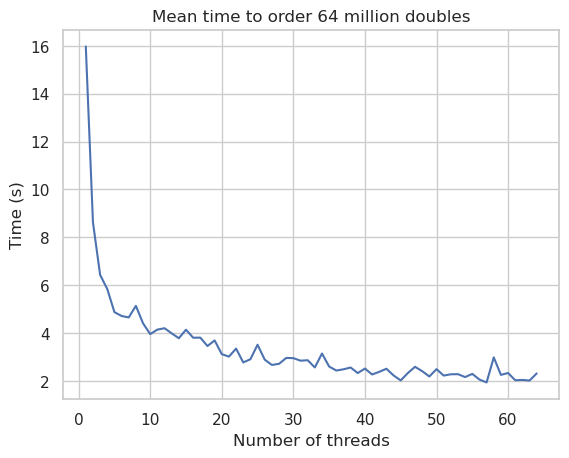

In [11]:
# Plot the mean times with seaborn

sns.set_style("whitegrid")
ax = sns.lineplot(x="Threads", y="Time", data=mean_times)
ax.set_title('Mean time to order 64 million doubles')
ax.set_xlabel('Number of threads')
ax.set_ylabel('Time (s)')
plt.show()


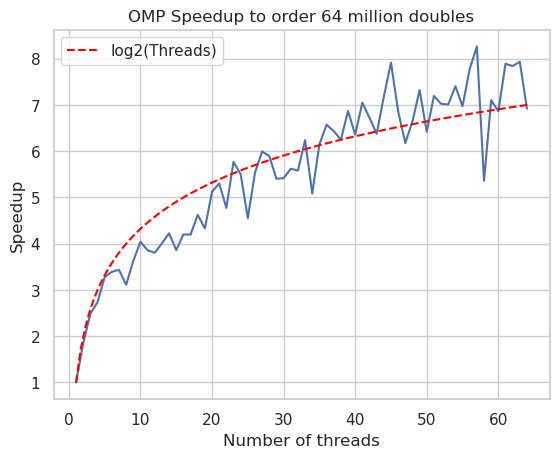

In [14]:
# Plot speedup
speedup = mean_times['Time'][0] / mean_times['Time']
ax = sns.lineplot(x=mean_times['Threads'], y=speedup)
# Add a log_2 plot to the same graph
x = np.linspace(1, mean_times['Threads'].max(), 100)
y = np.log2(x) + np.ones(100)
plt.plot(x, y, label='log2(Threads)', linestyle='--', color='red')

ax.set_title('OMP Speedup to order 64 million doubles')
ax.set_xlabel('Number of threads')
ax.set_ylabel('Speedup')
plt.legend()
plt.show()